In [45]:
#!pip install ipywidgets

In [81]:
import pandas as pd
import urllib.parse
import matplotlib.pyplot as plt
import numpy as np
import ffkkmo_ra
import ipywidgets as widgets

Получим датасет

In [82]:
df = pd.read_csv("ffkkmo_clean.csv", index_col='Unnamed: 0')
df_judges = pd.read_csv("ffkkmo_judges_clean.csv", index_col='Unnamed: 0')

In [83]:
clubs = sorted(list(filter(lambda x : isinstance(x, str), df.club.unique())))
categoies = df.category.unique()
club = widgets.Dropdown(
    options=clubs,
    value=clubs[0],
    description='Школа:',
    disabled=False,
)
category = widgets.Dropdown(
    options=categoies,
    value=categoies[0],
    description='Разряд:',
    disabled=False,
)
limit_val = widgets.IntSlider(
    value=50,
    min=0,
    max=200,
    step=1,
    description='Количество:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
season = widgets.Dropdown(
    options=[2021, 2122, 2223, 2324, 2425],
    value=2425,
    description='Сезон:',
    disabled=False,
)

In [84]:
display(club)
display(category)
display(season)
display(limit_val)

Dropdown(description='Школа:', options=('Балашиха, АНО ДЮСШ «Олимп»', 'Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина…

Dropdown(description='Разряд:', options=('3-й юношеский разряд, мальчики', '3-й юношеский разряд, девочки', '2…

Dropdown(description='Сезон:', index=4, options=(2021, 2122, 2223, 2324, 2425), value=2425)

IntSlider(value=50, continuous_update=False, description='Количество:', max=200)

In [85]:
ffkkmo_ra.get_top_df(df, 5)

Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»                    2495
Щелково, МАУ ГОЩ «ФОК «Ледовая арена» им. В.А. Третьяка     1967
Одинцово, МБУ ДО СШ «Одинцово»                              1911
Лыткарино, МАУ «ЛСК Лыткарино»                              1844
Наро-Фоминский, МАУ ДО ЦСШ №1                               1662
Остальные                                                  19815
Name: club, dtype: int64

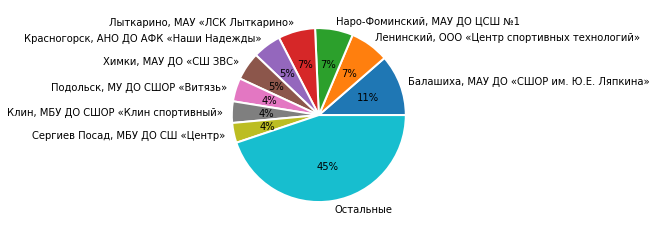

In [86]:
ffkkmo_ra.pie_of_winners(df, 2425, 3, 9, "Доля призеров в сезоне 24-25")
plt.title("", fontsize=16)
plt.xlabel("", fontsize=18)
plt.ylabel("", fontsize=18);

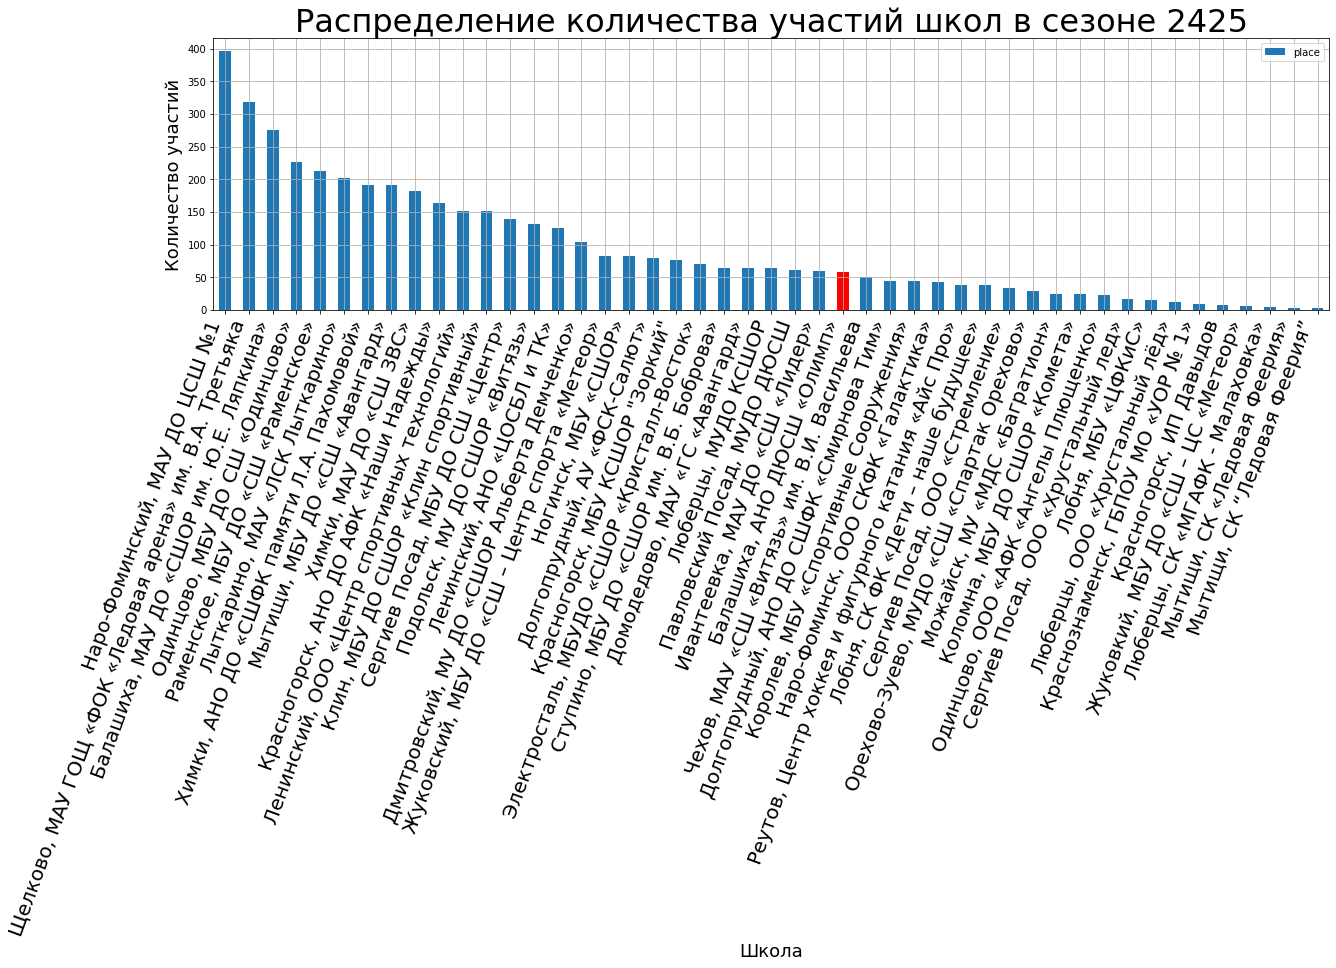

In [87]:
ffkkmo_ra.plot_clubs_in_season(df, season.value, limit_val.value, club.value)

,date,firstname,lastname,club,rank,tss,tes,pcs,year,month,season,label


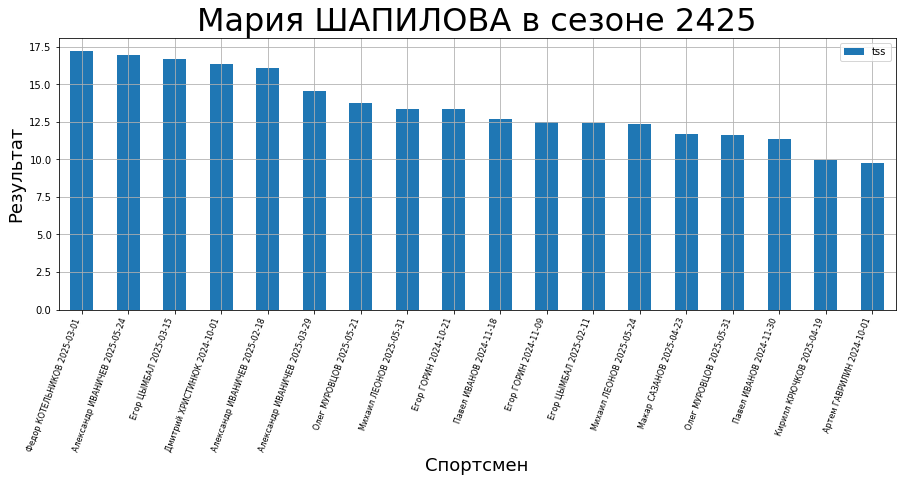

In [88]:
ffkkmo_ra.sportsmen_rating_in_season(df, season.value, category.value, 'Мария', 'ШАПИЛОВА', limit=limit_val.value)

,date,firstname,lastname,club,rank,tss,tes,pcs,year,month,season,label


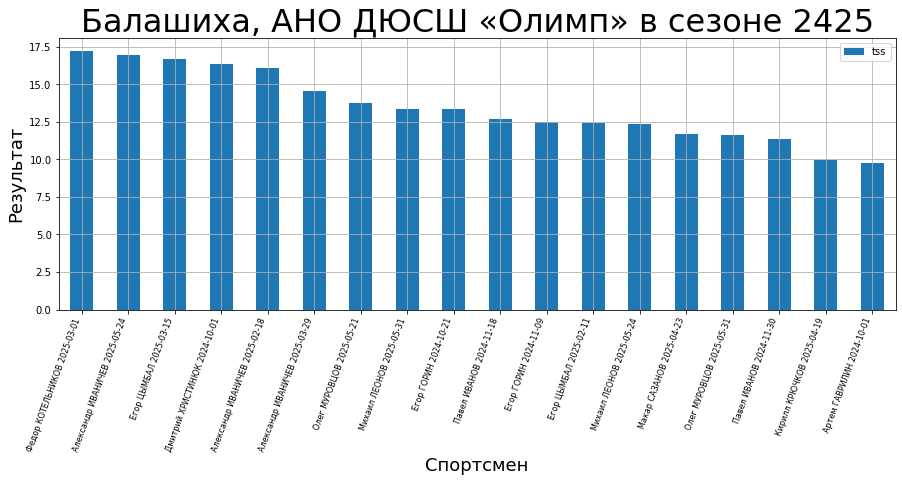

In [89]:
ffkkmo_ra.club_rating_in_season(df, season.value, category.value, club.value, limit=limit_val.value)

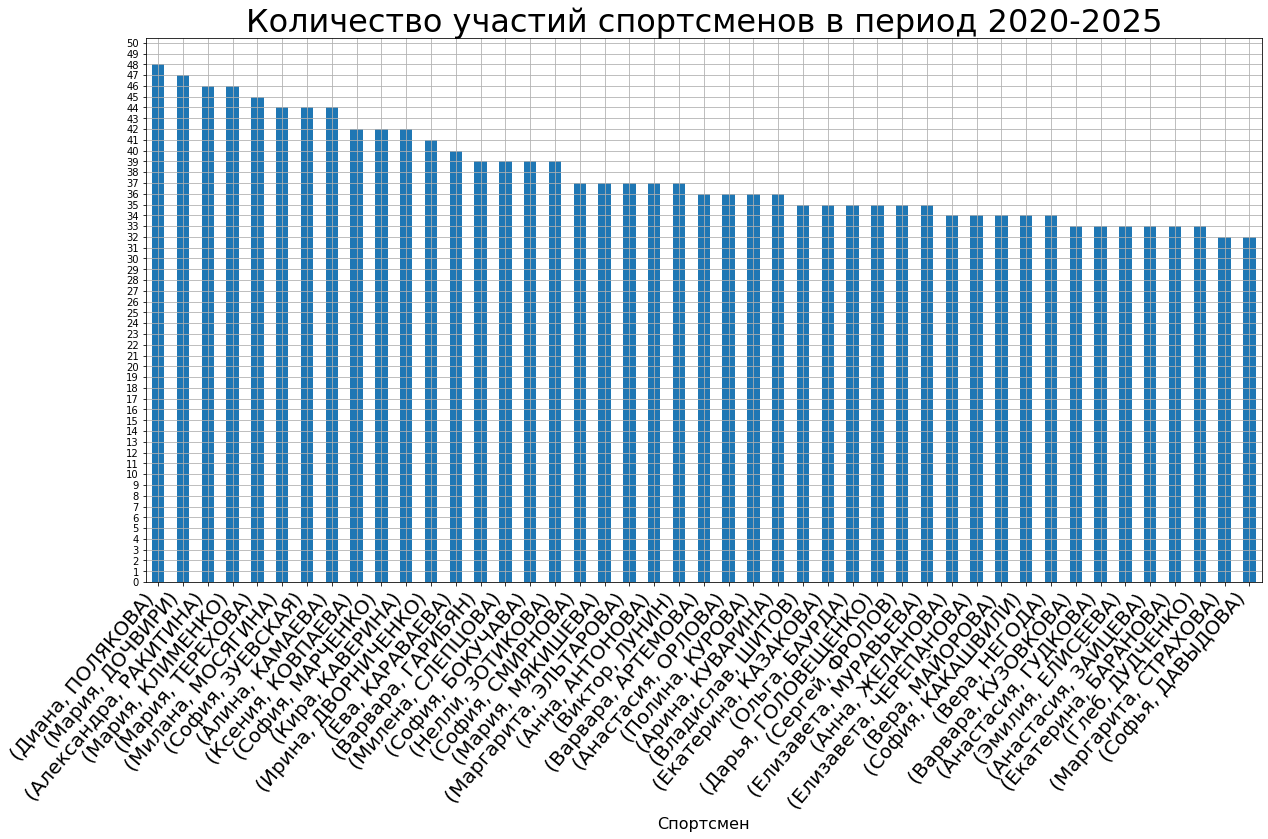

In [90]:
data = df[df['segment']=='Произвольная программа'].groupby(['firstname', 'lastname']).count().sort_values(
    by='date', ascending=False).head(45)['date']
ax = data.plot(
    kind='bar', figsize=(20, 10), grid=True
)
major_ticks = np.arange(0, max(data) + 3, 1)
ax.set_yticks(major_ticks)
plt.title("Количество участий спортсменов в период 2020-2025", fontsize=32)
plt.xlabel('Спортсмен', fontsize=16)
plt.ylabel(f'', fontsize=18)
plt.xticks(fontsize=20, rotation=50, horizontalalignment='right');

In [91]:
data = df[df['segment']=='Произвольная программа'].groupby(['firstname', 'lastname']).count().sort_values(
    by='date', ascending=False).head(45)['date']
max(data)

48

In [92]:
df[df['category'].isin(categoies)&(df['season']==2425)].sort_values(by="tss").groupby(["category", "segment"]).last()[['club', 'date', 'firstname', 'lastname', 'tss', 'tes', 'pcs']]

club  \
category                        segment                                                                 
1-й спортивный разряд, девочки  Короткая программа           Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»   
                                Произвольная программа   Ленинский, ООО «Центр спортивных технологий»   
1-й спортивный разряд, мальчики Короткая программа                    Сергиев Посад, ООО «Стремление»   
                                Произвольная программа                Сергиев Посад, ООО «Стремление»   
1-й юношеский разряд, девочки   Произвольная программа        Ступино, МБУ ДО «СШОР им. В.Б. Боброва»   
1-й юношеский разряд, мальчики  Произвольная программа                Сергиев Посад, ООО «Стремление»   
2-й спортивный разряд, девочки  Короткая программа       Ленинский, ООО «Центр спортивных технологий»   
                                Произвольная программа           Одинцово, ООО «АФК «Ангелы Плющенко»   
2-й спортивный разряд, мальчики Короткая программа                  Раменское, МБУ ДО «СШ «Раменское»   
                                Произвольная программа                 Лыткарино, МАУ «ЛСК Лыткарино»   
2-й юношеский разряд, девочки   Произвольная программа                  Мытищи, МБУ ДО «СШ «Авангард»   
2-й юношеский разряд, мальчики  Произвольная программа       Долгопрудный, АНО ДО СШФК «Смирнова Тим»   
3-й спортивный разряд, девочки  Произвольная программа                  Подольск, МУ ДО СШОР «Витязь»   
3-й спортивный разряд, мальчики Произвольная программа                            Люберцы, МУДО КСШОР   
3-й юношеский разряд, девочки   Произвольная программа         Красногорск, АНО ДО АФК «Наши Надежды»   
3-й юношеский разряд, мальчики  Произвольная программа       Долгопрудный, АНО ДО СШФК «Смирнова Тим»   
КМС, девушки                    Короткая программа       Ленинский, ООО «Центр спортивных технологий»   
                                Произвольная программа           Одинцово, ООО «АФК «Ангелы Плющенко»   
КМС, юноши                      Короткая программа               Одинцово, ООО «АФК «Ангелы Плющенко»   
                                Произвольная программа           Одинцово, ООО «АФК «Ангелы Плющенко»   
МС, девушки                     Короткая программа               Одинцово, ООО «АФК «Ангелы Плющенко»   
                                Произвольная программа       Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»   
МС, юноши                       Короткая программа               Одинцово, ООО «АФК «Ангелы Плющенко»   
                                Произвольная программа           Одинцово, ООО «АФК «Ангелы Плющенко»   
Младшая группа, девочки         Короткая программа       Ленинский, ООО «Центр спортивных технологий»   
                                Произвольная программа   Ленинский, ООО «Центр спортивных технологий»   
Младшая группа, мальчики        Короткая программа                     Одинцово, МБУ ДО СШ «Одинцово»   
                                Произвольная программа              Раменское, МБУ ДО «СШ «Раменское»   
Старшая группа, девочки         Короткая программа       Ленинский, ООО «Центр спортивных технологий»   
                                Произвольная программа   Ленинский, ООО «Центр спортивных технологий»   
Старшая группа, мальчики        Короткая программа                    Сергиев Посад, ООО «Стремление»   
                                Произвольная программа                Сергиев Посад, ООО «Стремление»   
Юный фигурист, девочки          Катание под музыку                     Лыткарино, МАУ «ЛСК Лыткарино»   
                                Произвольная программа  Жуковский, МБУ ДО «СШ – Центр спорта «Метеор»   
Юный фигурист, мальчики         Катание под музыку                     Лыткарино, МАУ «ЛСК Лыткарино»   
                                Произвольная программа              Раменское, МБУ ДО «СШ «Раменское»   

                                                              date  firstname  \
category                 

In [93]:
df[(df['season']==2425)].groupby("category").count()['date']

category
1-й спортивный разряд, девочки      914
1-й спортивный разряд, мальчики      72
1-й юношеский разряд, девочки       448
1-й юношеский разряд, мальчики       27
2-й спортивный разряд, девочки     1323
2-й спортивный разряд, мальчики      50
2-й юношеский разряд, девочки       881
2-й юношеский разряд, мальчики       76
3-й спортивный разряд, девочки      747
3-й спортивный разряд, мальчики      62
3-й юношеский разряд, девочки       618
3-й юношеский разряд, мальчики       18
КМС, девушки                        102
КМС, юноши                           30
МС, девушки                           6
МС, юноши                            12
Младшая группа, девочки              59
Младшая группа, мальчики             10
Старшая группа, девочки              60
Старшая группа, мальчики              8
Юный фигурист, девочки              182
Юный фигурист, мальчики              16
Name: date, dtype: int64

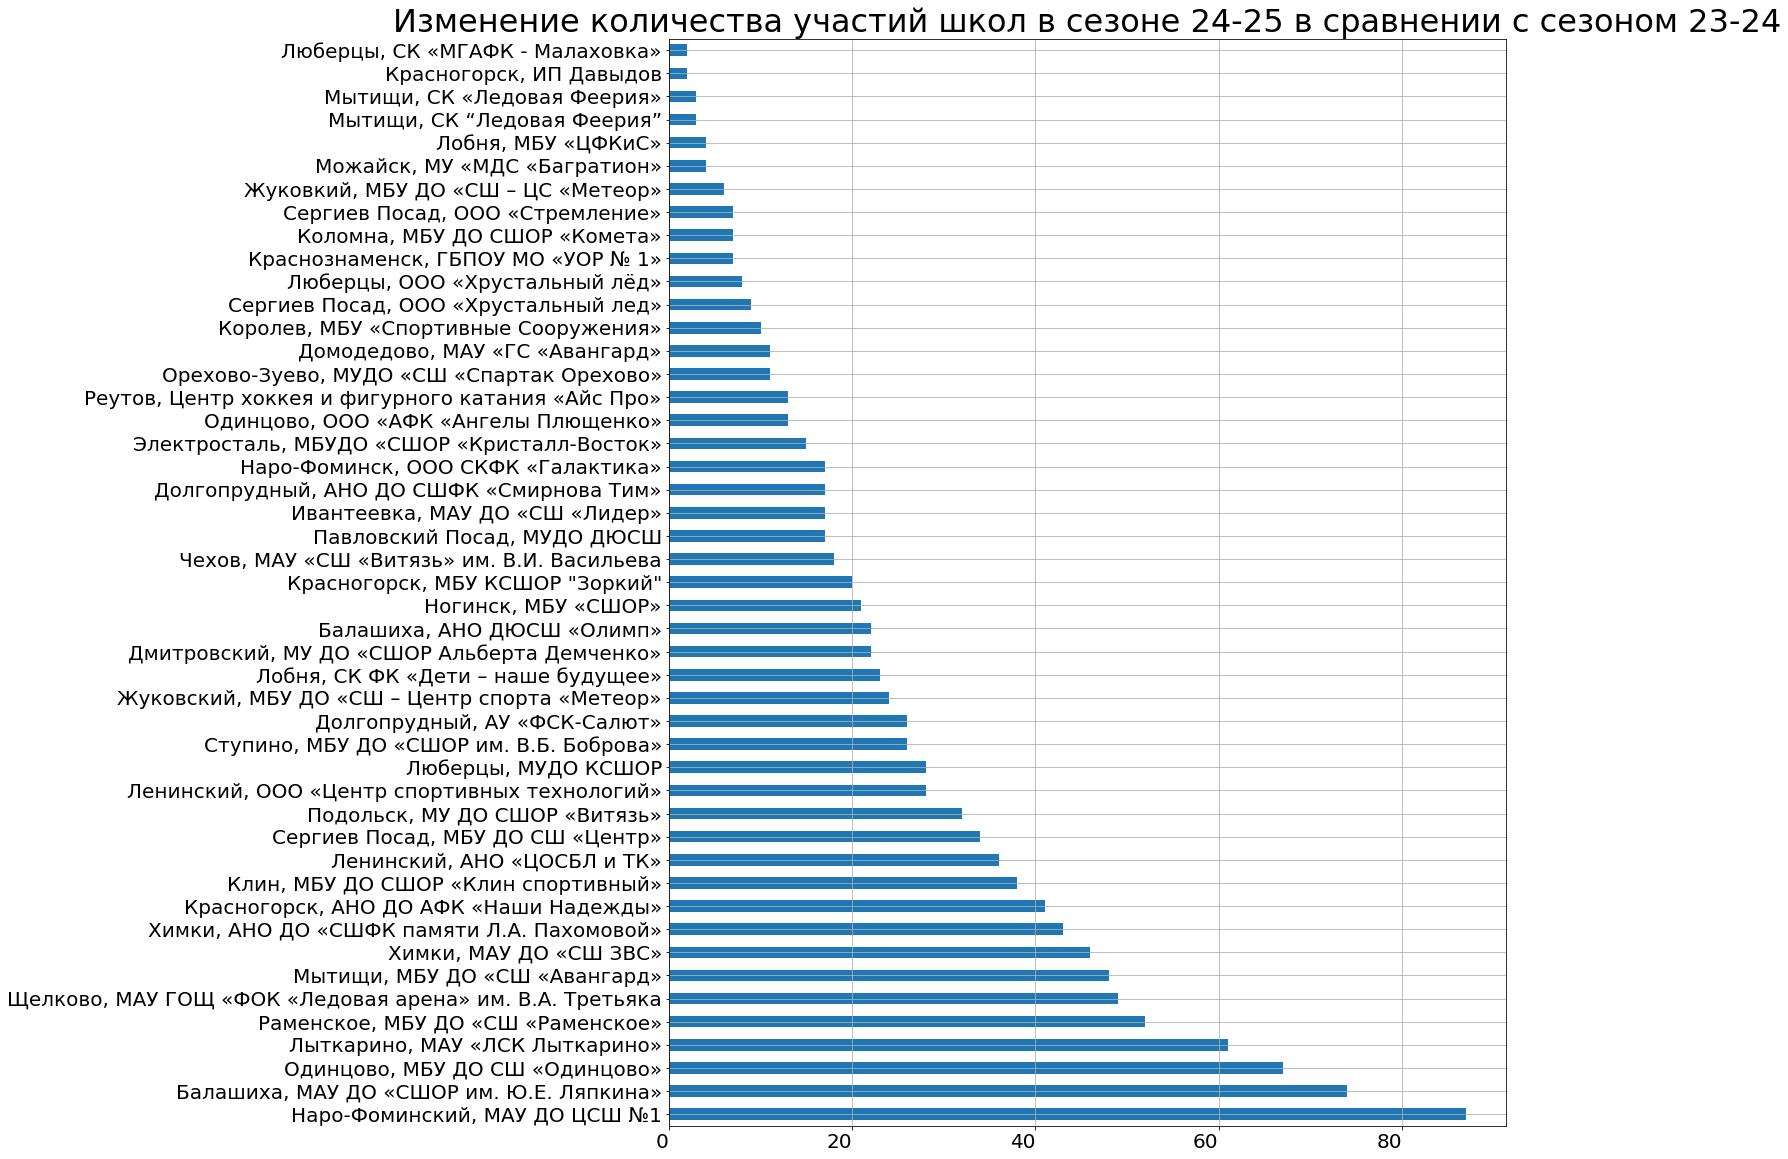

In [94]:
df_groupped = df.groupby(["firstname", "lastname", "club", "season"]).last().reset_index()
pivot_df = pd.pivot_table(df_groupped, values='date', index='club', columns='season', aggfunc='count')
tdf = pivot_df[2425]
tdf = tdf.dropna()
tdf.sort_values(ascending=False).plot(
    kind='barh', figsize=(15, 20), grid=True
)
plt.title("Изменение количества участий школ в сезоне 24-25 в сравнении с сезоном 23-24", fontsize=32)
plt.ylabel(f'', fontsize=18)
plt.yticks(fontsize=20, rotation=0, horizontalalignment='right');
plt.xticks(fontsize=20, rotation=0, horizontalalignment='right');

In [95]:
df_groupped[(df_groupped['season'] == 2223) & (df_groupped['club'] == 'Люберцы, МУДО КСШОР')].count()

firstname     25
lastname      25
club          25
season        25
date          25
place         25
online        25
category      25
segment       25
rank          25
middlename     0
tss           25
tes           25
pcs           25
year          25
month         25
dtype: int64

In [96]:
pd.set_option('display.max_rows', 100)
display(pivot_df.sort_values(by=2425, ascending=False))

season,2021,2122,2223,2324,2425
club,,,,,
"Наро-Фоминский, МАУ ДО ЦСШ №1",39.0,40.0,81.0,101.0,87.0
"Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»",95.0,90.0,76.0,80.0,74.0
"Одинцово, МБУ ДО СШ «Одинцово»",129.0,114.0,114.0,75.0,67.0
"Лыткарино, МАУ «ЛСК Лыткарино»",76.0,73.0,63.0,66.0,61.0
"Раменское, МБУ ДО «СШ «Раменское»",34.0,37.0,46.0,43.0,52.0
"Щелково, МАУ ГОЩ «ФОК «Ледовая арена» им. В.А. Третьяка",66.0,60.0,56.0,59.0,49.0
"Мытищи, МБУ ДО «СШ «Авангард»",65.0,62.0,49.0,49.0,48.0
"Химки, МАУ ДО «СШ ЗВС»",37.0,38.0,52.0,47.0,46.0
"Химки, АНО ДО «СШФК памяти Л.А. Пахомовой»",42.0,45.0,54.0,57.0,43.0


In [97]:
idx = df[(df['lastname']=='ШАПИЛОВА')].groupby(["category", "segment"])['tss'].idxmax()
df.loc[idx].groupby(["category", "segment"]).last()

date  \
category                       segment                              
1-й спортивный разряд, девочки Короткая программа      2024-10-12   
                               Произвольная программа  2024-10-26   
1-й юношеский разряд, девочки  Произвольная программа  2021-12-14   
2-й спортивный разряд, девочки Короткая программа      2022-12-10   
                               Произвольная программа  2022-12-10   
2-й юношеский разряд, девочки  Произвольная программа  2021-04-17   
3-й спортивный разряд, девочки Произвольная программа  2022-05-07   
3-й юношеский разряд, девочки  Произвольная программа  2020-11-28   

                                                                                                   place  \
category                       segment                                                                     
1-й спортивный разряд, девочки Короткая программа       г. Ивантеевка, ул. Победы, д. 2, ФОК ЛСК "Лидер"   
                               Произвольная программа  г. Наро-Фоминск, ул. Профсоюзная, д. 36Б, ледо...   
1-й юношеский разряд, девочки  Произвольная программа  г. Королев, Октябрьский бульвар д.10, ЛД им. А...   
2-й спортивный разряд, девочки Короткая программа                       г.о. Лыткарино, ул. Советская 9А   
                               Произвольная программа                   г.о. Лыткарино, ул. Советская 9А   
2-й юношеский разряд, девочки  Произвольная программа  г. Долгопрудный, ул. Ракетостроителей д.4. ФСК...   
3-й спортивный разряд, девочки Произвольная программа  г. Лыткарино, ул. Советская д.9а, ЛСК «Лыткарино»   
3-й юношеский разряд, девочки  Произвольная программа  г. Лыткарино. ул. Советская д.9А, МАУ ЛСК "Лыт...   

                                                                                               online  \
category                       segment                                                                  
1-й спортивный разряд, девочки Короткая программа                 http://ffkkmo.ru/events/2425/iva10/   
                               Произвольная программа              http://ffkkmo.ru/events/2425/nf10/   
1-й юношеский разряд, девочки  Произвольная программа       http://ffkkmo.ru/events/2122/korolev1221/   
2-й спортивный разряд, девочки Короткая программа         http://ffkkmo.ru/events/2223/lytkarino1210/   
                               Произвольная программа     http://ffkkmo.ru/events/2223/lytkarino1210/   
2-й юношеский разряд, девочки  Произвольная программа  http://ffkkmo.ru/events/2021/dolgoprudniy0421/   
3-й спортивный разряд, девочки Произвольная программа     http://ffkkmo.ru/events/2122/lytkarino0507/   
3-й юношеский разряд, девочки  Произвольная программа     http://ffkkmo.ru/events/2021/lytkarino1128/   

                                                       rank firstname  \
category                       segment                                  
1-й спортивный разряд, девочки Короткая программа         4     Мария   
                               Произвольная программа     4     Мария   
1-й юношеский разряд, девочки  Произвольная программа     2     Мария   
2-й спортивный разряд, девочки Короткая программа         1     Мария   
                               Произвольная программа     2     Мария   
2-й юношеский разряд, девочки  Произвольная программа     4     Мария   
3-й спортивный разряд, девочки Произвольная программа     6     Мария   
3-й юношеский разряд, девочки  Произвольная программа    20     Мария   

                                                      middlename  lastname  \
category                       segment                                       
1-й спортивный разряд, девочки Короткая программа           None  ШАПИЛОВА   
                               Произвольная программа       None  ШАПИЛОВА   
1-й юношеский разряд, девочки  Произвольная программа       None  ШАПИЛОВА   
2-й спортивный разряд, девочки Короткая программа           None  ШАПИЛОВА   
                               Произвол

In [98]:
df[(df['lastname']=='СИНЬКОВА')].groupby(["category", "segment", "firstname", "lastname"]).count()["date"]

category                       segment                 firstname  lastname
1-й юношеский разряд, девочки  Произвольная программа  Анфиса     СИНЬКОВА    4
2-й юношеский разряд, девочки  Произвольная программа  Анфиса     СИНЬКОВА    5
3-й юношеский разряд, девочки  Произвольная программа  Анфиса     СИНЬКОВА    4
Юный фигурист, девочки         Произвольная программа  Анфиса     СИНЬКОВА    1
Name: date, dtype: int64

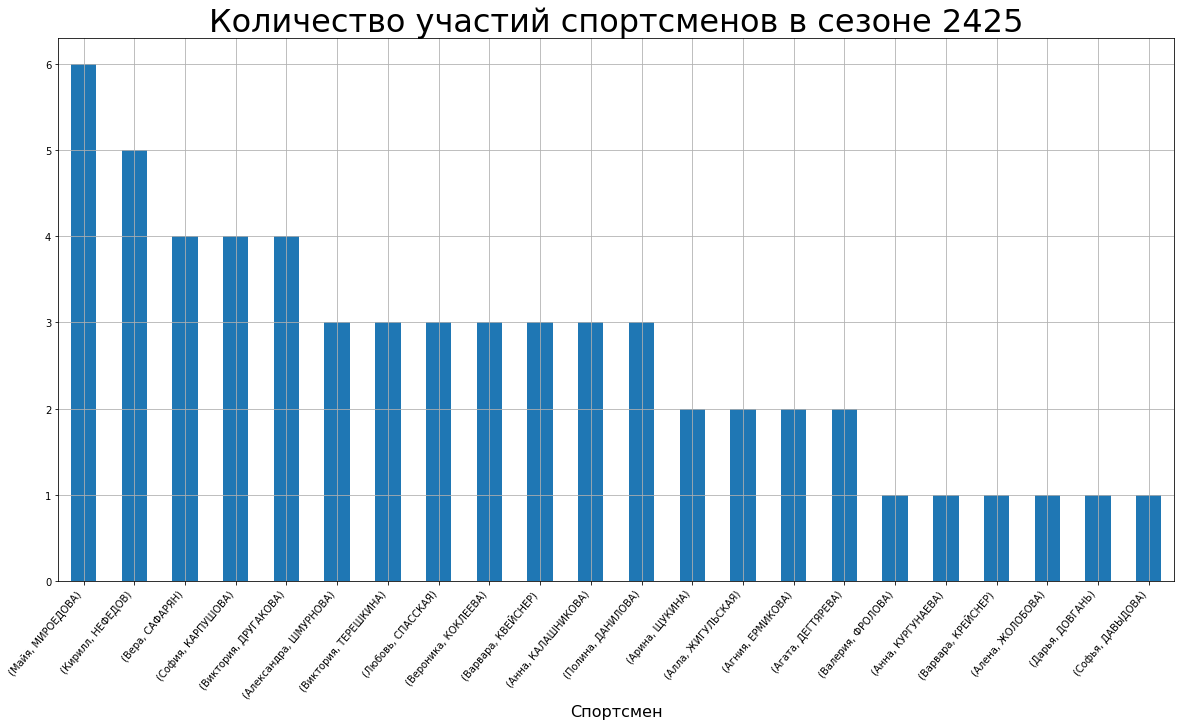

In [99]:
ffkkmo_ra.participants_of_club_in_season(df, club.value, season.value)

In [100]:
def participants_of_club_in_season(df, club, season):
    data = (
        ffkkmo_ra.get_df_of_club_in_season(df, club, season)
        .groupby(["date", "firstname", "lastname"])
        .last()
        .reset_index()
        .groupby(["firstname", "lastname"])
        .count()
        .sort_values(by=["date", "lastname"], ascending=False)["club"]
    )
    ax = data.plot(kind="bar", figsize=(20, 10), grid=True)
    major_ticks = np.arange(0, max(data) + 1, 1)
    ax.set_yticks(major_ticks)
    plt.title(f"Количество участий спортсменов в сезоне {season}", fontsize=32)
    plt.xlabel("Спортсмен", fontsize=16)
    plt.ylabel(f"", fontsize=18)
    plt.xticks(fontsize=10, rotation=50, horizontalalignment="right")

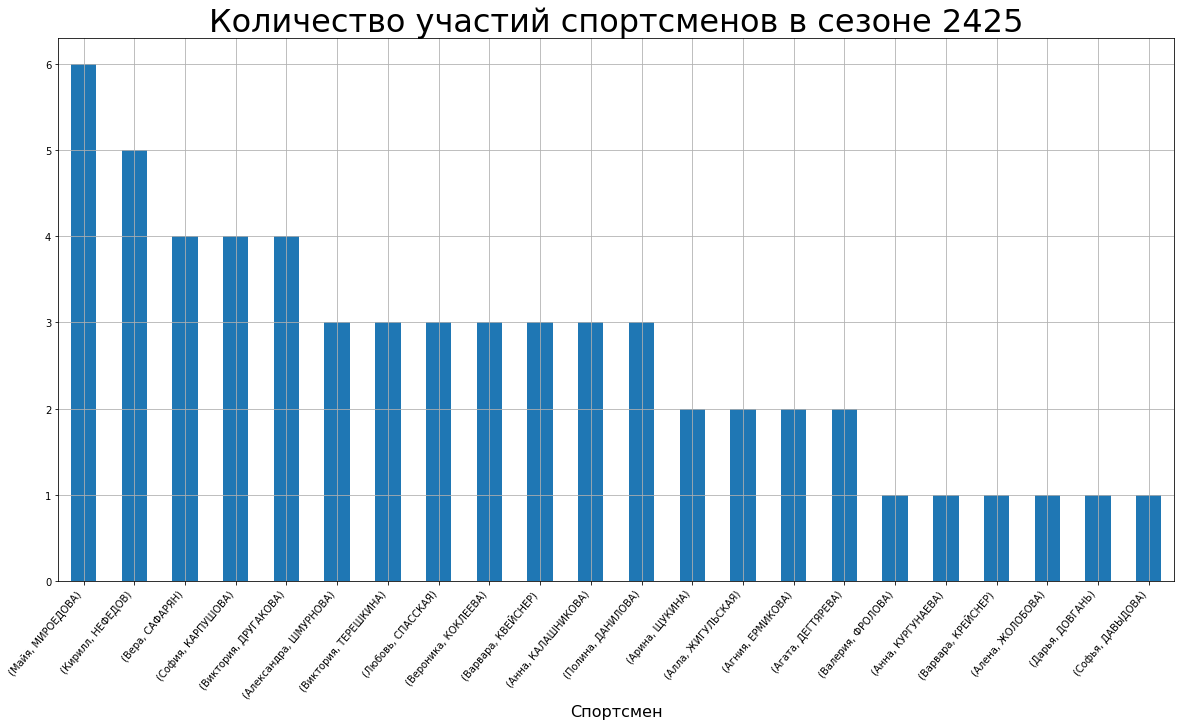

In [101]:
participants_of_club_in_season(df, club.value, season.value)

<Axes: >

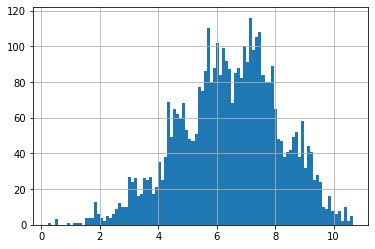

In [173]:
df[(df['category'] == '3-й юношеский разряд, девочки')]['tes'].hist(bins=100)

In [103]:
tes_min = dict(zip([(x[0], x[1]) for x in ffkkmo_ra.sorter_names], [(x[2]) for x in ffkkmo_ra.sorter_names]))

In [104]:
def calc_procentage(x):
    return len(list(filter(lambda y : y > avg(x[1]), x[0]))) / len(x[0]) * 100

In [105]:
for x in tes_min:
    df.loc[(df['category'] == x[0]) & (df['segment'] == x[1]), 'tes_min'] = tes_min[x]
df['tes_done'] = df['tes'] >= df['tes_min']

In [106]:
df.category.unique()

array(['3-й юношеский разряд, мальчики', '3-й юношеский разряд, девочки',
       '2-й юношеский разряд, мальчики', '2-й юношеский разряд, девочки',
       '1-й юношеский разряд, мальчики', '1-й юношеский разряд, девочки',
       '3-й спортивный разряд, мальчики',
       '3-й спортивный разряд, девочки', '1-й спортивный разряд, девочки',
       '1-й спортивный разряд, мальчики',
       '2-й спортивный разряд, девочки',
       '2-й спортивный разряд, мальчики', 'КМС, девушки', 'КМС, юноши',
       'Юный фигурист, девочки', 'Юный фигурист, мальчики', 'МС, девушки',
       'Младшая группа, девочки', 'Младшая группа, мальчики',
       'Старшая группа, девочки', 'Старшая группа, мальчики', 'МС, юноши'],
      dtype=object)

In [107]:
cats = list(set([x[0] for x in ffkkmo_ra.sorter_names]))

In [108]:
pvt = pd.pivot_table(
    df.query("category in @cats"), 
    values='tes_done', 
    index=['category', 'segment'], 
    columns='season', 
    aggfunc=lambda x : round(sum(x) / len(x) * 100, 2)
)
sorterIndex = dict(zip([(x[0], x[1]) for x in ffkkmo_ra.sorter_names], range(len(ffkkmo_ra.sorter_names))))
pvt['category_Rank'] = pvt.index.map(lambda x : sorterIndex[x])
pvt.sort_values('category_Rank', ascending = True, inplace = True)
pvt.drop('category_Rank', 1, inplace = True)
pvt

,season,2021,2122,2223,2324,2425
category,segment,,,,,
"3-й юношеский разряд, мальчики",Произвольная программа,92.86,90.22,48.61,42.37,55.56
"3-й юношеский разряд, девочки",Произвольная программа,88.48,89.13,60.18,50.08,55.02
"2-й юношеский разряд, мальчики",Произвольная программа,47.73,59.15,24.49,24.56,18.42
"2-й юношеский разряд, девочки",Произвольная программа,54.61,60.14,31.74,24.30,26.79
"1-й юношеский разряд, мальчики",Произвольная программа,29.17,45.59,33.33,66.67,44.44
"1-й юношеский разряд, девочки",Произвольная программа,45.10,48.91,54.22,56.77,58.48
"3-й спортивный разряд, мальчики",Произвольная программа,45.12,30.56,22.45,12.50,25.81
"3-й спортивный разряд, девочки",Произвольная программа,29.81,32.80,32.96,36.71,31.99
"2-й спортивный разряд, мальчики",Короткая программа,49.23,65.31,63.49,74.29,32.00


In [110]:
df[(df['season'] == 2425)&(df['lastname'] == 'АВАГЯН')&(df['firstname'] == 'Дивин')]

,date,place,online,category,segment,rank,firstname,middlename,lastname,club,tss,tes,pcs,year,month,season,tes_min,tes_done
27154,2024-12-18,"г. Ногинск, ул. Климова, д. 48, к. А, ФОК ""Лед...",http://ffkkmo.ru/events/2425/ng12/,"3-й юношеский разряд, девочки",Произвольная программа,14,Дивин,NaN,АВАГЯН,"Люберцы, МУДО КСШОР",13.85,2.97,10.88,2024,12,2425,5.5,False
27530,2025-01-23,"г. Ногинск, ул. Климова, 48, кор. А,ФОК Ледова...",http://ffkkmo.ru/events/2425/ng01/,"3-й юношеский разряд, девочки",Произвольная программа,4,Дивин,NaN,АВАГЯН,"Люберцы, МУДО КСШОР",15.41,5.40,10.01,2025,1,2425,5.5,False
30681,2025-05-24,"г. Электросталь, ул. Радио, д. 3, ЛДС ""Кристалл""",http://ffkkmo.ru/events/2425/el05/,"2-й юношеский разряд, девочки",Произвольная программа,17,Дивин,Тиграновна,АВАГЯН,"Люберцы, МУДО КСШОР",19.61,5.91,15.20,2025,5,2425,9.5,False


In [161]:
df_spec = df_judges[df_judges['function'] == 'Технический специалист'].groupby(['date', 'online']).first()
df_spec = df_spec.rename(columns={"name": "ts"})
df_cont = df_judges[df_judges['function'] == 'Технический контролер'].groupby(['date', 'online']).first()
df_cont = df_cont.rename(columns={"name": "tc"})

In [163]:
tes_done_stat = df.groupby(['date', 'online'])['tes_done'].agg(['sum', 'count'])
tes_done_stat['ratio'] = (tes_done_stat['sum']/tes_done_stat['count'])
tes_done_stat.sort_values(by='ratio', ascending=False, inplace=True)
tes_done_stat = tes_done_stat.join(df_spec['ts']).join(df_cont['tc'])

In [170]:
tes_done_stat.reset_index().groupby(['ts', 'tc']).agg('mean').sort_values(by='ratio', ascending=False)

sum       count     ratio
ts                   tc                                                  
Александр КОНДАКОВ   Елена ЭЙСМОНТ        74.000000  103.000000  0.718447
Стас КОВАЛЕВ         Ольга КОВАЛЬ         55.000000   80.000000  0.687500
Светлана БИЯН        Юлия ИЛИЕВА          44.000000   66.000000  0.666667
                     Татьяна ФЕДОРОВА     57.666667   90.333333  0.641925
                     Константин ЯБЛОЦКИЙ  67.000000  106.000000  0.632075
...                                             ...         ...       ...
Юлия МАРТЮШЕВА       Антон СОЛОВЬЕВ        7.000000   36.000000  0.194444
Станислав КОВАЛЕВ    Павел ТАТАРЕНКО      14.000000   73.000000  0.191781
Екатерина МОНИЧ      Елена ЭЙСМОНТ        13.000000   87.000000  0.149425
Александр САМОХВАЛОВ Елена МЕЛИКОВА        8.000000   76.500000  0.145455
Наталья ЛЕБЕДЕВА     Галина ИСТОМИНА       0.000000    6.000000  0.000000

[115 rows x 3 columns]

In [181]:
tes_done_stat = df[df['season'] == 2425].groupby(['club'])['tes_done'].agg(['sum', 'count'])
tes_done_stat['ratio'] = (tes_done_stat['sum']/tes_done_stat['count'])
tes_done_stat = tes_done_stat[tes_done_stat['count'] > 10].sort_values(by='ratio', ascending=False)
tes_done_stat['percentage'] = tes_done_stat['ratio'].apply(lambda x: str(round(x*100, 2)) + '%')

In [182]:
tes_done_stat['percentage'].plot(kind='bar')

,sum,count,ratio,percentage
club,,,,
"Долгопрудный, АНО ДО СШФК «Смирнова Тим»",54,64,0.843750,84.38%
"Ленинский, ООО «Центр спортивных технологий»",176,247,0.712551,71.26%
"Красногорск, АНО ДО АФК «Наши Надежды»",127,188,0.675532,67.55%
"Подольск, МУ ДО СШОР «Витязь»",88,147,0.598639,59.86%
"Ступино, МБУ ДО «СШОР им. В.Б. Боброва»",48,81,0.592593,59.26%
"Коломна, МБУ ДО СШОР «Комета»",17,29,0.586207,58.62%
"Сергиев Посад, ООО «Стремление»",34,58,0.586207,58.62%
"Красногорск, ИП Давыдов",7,13,0.538462,53.85%
"Можайск, МУ «МДС «Багратион»",26,49,0.530612,53.06%
